In [1]:
import networkx as nx # Graph Data Mining

# Packages for Data Analysis
import pandas as pd
import numpy as np

import random # Generating Random Number
from tqdm import tqdm # Progress Bar

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # To show Chinese Label, not necessary for English and other languages
plt.rcParams['axes.unicode_minus']=False  # To Show minus sign

In [2]:
df = pd.read_csv("G:\\文章\\知识图谱\\sedimentology.csv")

In [3]:
df.head()

,source,target,depth
0,Rimmed_carbonate_platform,RCP,1
1,FZ1,Rimmed_carbonate_platform,2
2,FZ2,Rimmed_carbonate_platform,2
3,FZ3,Rimmed_carbonate_platform,2
4,FZ4,Rimmed_carbonate_platform,2


In [4]:
df.shape

(633, 3)

In [5]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr='depth', create_using=nx.Graph())

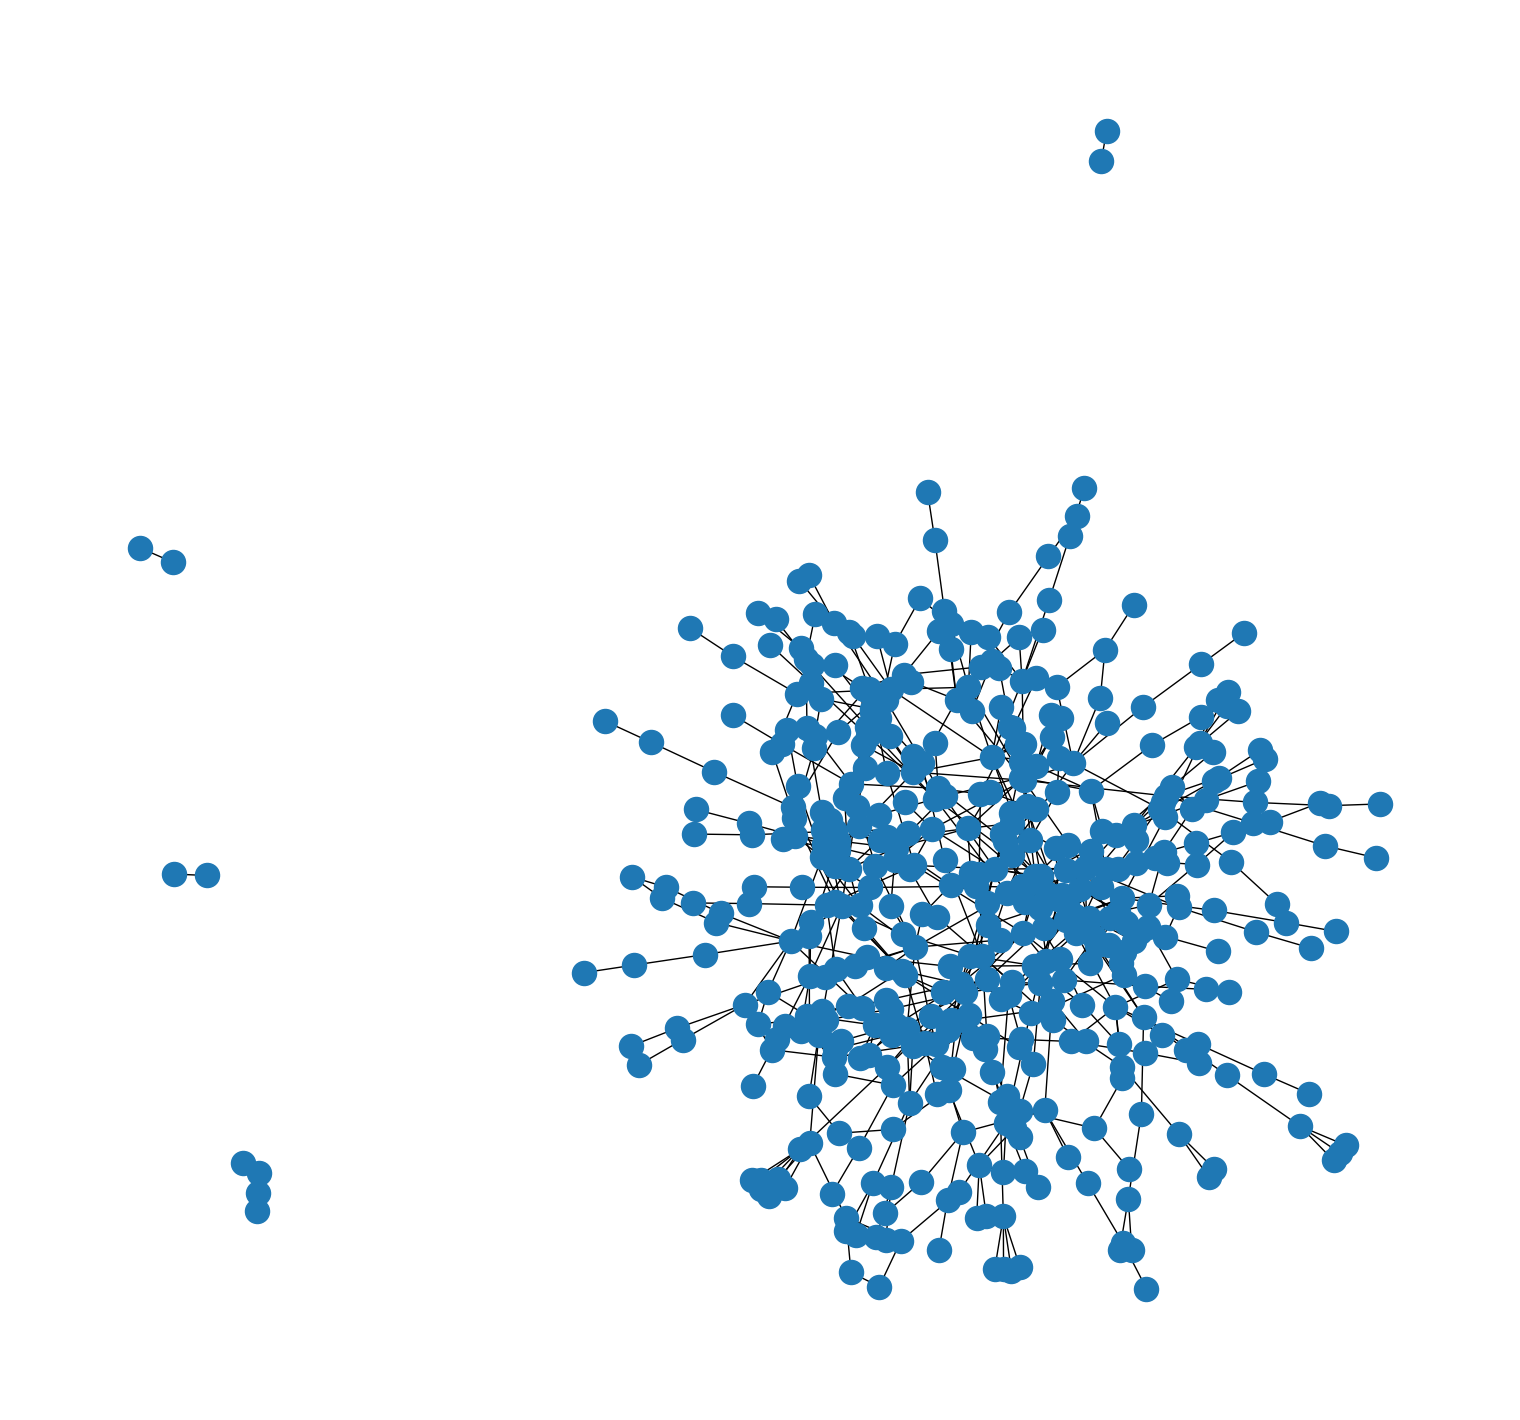

In [6]:
# Visualization
plt.figure(figsize=(15,14))
nx.draw(G)
plt.show()

In [7]:
def get_randomwalk(node, path_length):
    '''
    Input the initial node and the lenth of sequence
    '''
    
    random_walk = [node]
    
    for i in range(path_length-1):
        # Adjacent nodes
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        # Select the next node from the sequence
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [8]:
all_nodes = list(G.nodes())

In [9]:
get_randomwalk('SMF7', 5)

['SMF7', 'T7', 'T7t', 'Texture_types_boundstones']

In [10]:
gamma = 5000 # the number of sequence
walk_length = 50 # Max lenth of the sequence

In [11]:
random_walks = []

for n in tqdm(all_nodes): # Traverse each node
    for i in range(gamma): # Generating gamma-number sequence from nodes
        random_walks.append(get_randomwalk(n, walk_length))

100%|████████████████████████████████████████████████████████████████████████████████| 452/452 [00:35<00:00, 12.91it/s]


In [12]:
random_walks[1]

['Rimmed_carbonate_platform', 'RCP']

In [13]:
from gensim.models import Word2Vec # NLP

In [14]:
model = Word2Vec(vector_size=256, # The dimension of Embedding
                 window=50, # The lenth of window
                 sg=1, # Skip-Gram
                 hs=0, # Softmax unlayered
                 negative=50, # Negative sampling
                 alpha=0.03,  # Initial learning rate 
                 min_alpha=0.0007, # Min learning rate
                 seed=14 # Random Seeds
                )

In [15]:
# Constructing vocabulary with random walk sequence
model.build_vocab(random_walks, progress_per=2)

In [19]:
# Training
model.train(random_walks, total_examples=model.corpus_count, epochs=5000, report_delay=1)

(863311950, 986538550)

In [20]:
X = model.wv.vectors

In [21]:
# From 256 dimensions to 3 dimensions
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=1000)
tsne_embed_3d = tsne.fit_transform(X)

In [22]:
# Add nodes
terms_chosen=(['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9',
                     'FZ10','SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C',
                     'SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23','SMF24','SMF25','SMF26',
                    'FZ10','FZ9','FZ8','FZ7','FZ6','FZ5','FZ4','FZ3','FZ2','FZ1','MSD26','MSD25','MSD24','MSD23','MSD22','MSD21',
                     'MSD20','MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11','MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4',
                     'MSD3','MSD2','MSD1'])

In [23]:
FZ = ['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9', 'FZ10']

In [24]:
SMF = ['SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13','SMF15C',
                     'SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23','SMF24','SMF25','SMF26']

In [25]:
MSD = ['MSD26','MSD25','MSD24','MSD23','MSD22','MSD21','MSD20','MSD19','MSD18','MSD17','MSD16','MSD15','MSD14','MSD12','MSD11','MSD10','MSD9','MSD8','MSD7','MSD6','MSD5','MSD4',
                     'MSD3','MSD2','MSD1']

In [26]:
df = pd.DataFrame()
df['X'] = tsne_embed_3d[:,0]
df['Y'] = tsne_embed_3d[:,1]
df['Z'] = tsne_embed_3d[:,2]
df['item'] = model.wv.index_to_key

In [27]:
df

,X,Y,Z,item
0,9.809216,-10.790575,22.893497,FZ8
1,-32.777035,19.745813,-11.780196,Grain_content_abundant
2,7.665257,-7.314936,8.399130,FZ7
3,23.170818,30.635818,-19.094492,Fossils_content_abundant
4,-39.762333,7.375979,3.968883,SMF15
...,...,...,...,...
447,-45.669437,-25.495361,3.765476,F17t
448,-41.045372,-25.666018,9.599030,Fossils_Tyes_benthic foraminifera or calcareou...
449,-44.695610,-30.772547,9.096327,F18t
450,-45.569702,-27.189817,22.495640,Fossils_Tyes_microbes and algae


In [28]:
df.to_csv('pca_vis_tsne3d_1.csv',index=False)

In [29]:
# Input word, output indes
term2index = model.wv.key_to_index
index2term = model.wv.index_to_key
term_index = np.array(term2index.values())

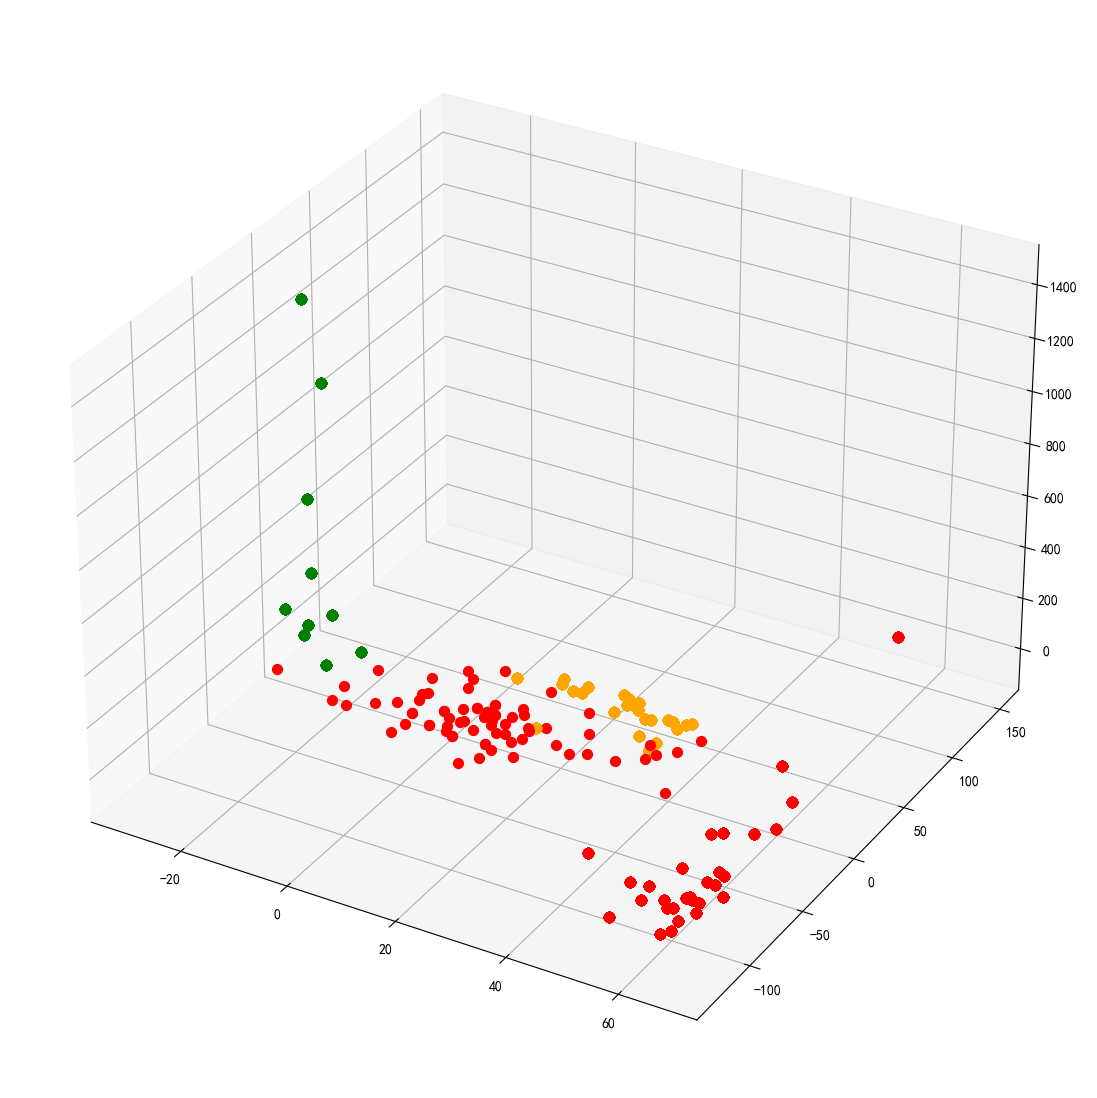

In [30]:
from mpl_toolkits import mplot3d
# %matplotlib notebook

# 3DVisualization
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')

for item in terms_chosen:
    idx = term2index[item]
    ax.scatter3D(tsne_embed_3d[idx,0], tsne_embed_3d[idx,1], tsne_embed_3d[idx,2] ,c='r',s=50)

    for fz in FZ:
        idx_fz = term2index[fz]
        ax.scatter3D(np.abs(tsne_embed_3d[idx_fz,0])-30, np.abs(tsne_embed_3d[idx_fz,1])-30,50*np.abs(tsne_embed_3d[idx_fz,2]),c='green',s=50)
    for smf in SMF:
        idx_smf = term2index[smf]
        ax.scatter3D((5)*np.log(np.abs(tsne_embed_3d[idx_smf,0]))+50, (-50)*np.log(np.abs(tsne_embed_3d[idx_smf,1]))+50,np.log(np.abs(tsne_embed_3d[idx_smf,2])) ,c='red',s=50)
    for msd in MSD:
        idx_msd = term2index[msd]
        ax.scatter3D(10*np.log(np.abs(tsne_embed_3d[idx_msd,0])), 10*np.log(np.abs(tsne_embed_3d[idx_msd,1])), np.log(np.abs(tsne_embed_3d[idx_msd,2])) ,c='orange',s=50)
plt.savefig("TSNE_3D_1.svg")
plt.show()

In [31]:
terms_chosen_mask = np.zeros(X.shape[0])
for item in terms_chosen:
    idx = term2index[item]
    terms_chosen_mask[idx] = 1

In [32]:
df = pd.DataFrame()
df['X'] = tsne_embed_3d[:,0]
df['Y'] = tsne_embed_3d[:,1]
df['Z'] = tsne_embed_3d[:,2]
df['item'] = model.wv.index_to_key
df = df.set_index('item')

In [33]:
df

,X,Y,Z
item,,,
FZ8,9.809216,-10.790575,22.893497
Grain_content_abundant,-32.777035,19.745813,-11.780196
FZ7,7.665257,-7.314936,8.399130
Fossils_content_abundant,23.170818,30.635818,-19.094492
SMF15,-39.762333,7.375979,3.968883
...,...,...,...
F17t,-45.669437,-25.495361,3.765476
Fossils_Tyes_benthic foraminifera or calcareous green algae,-41.045372,-25.666018,9.599030
F18t,-44.695610,-30.772547,9.096327


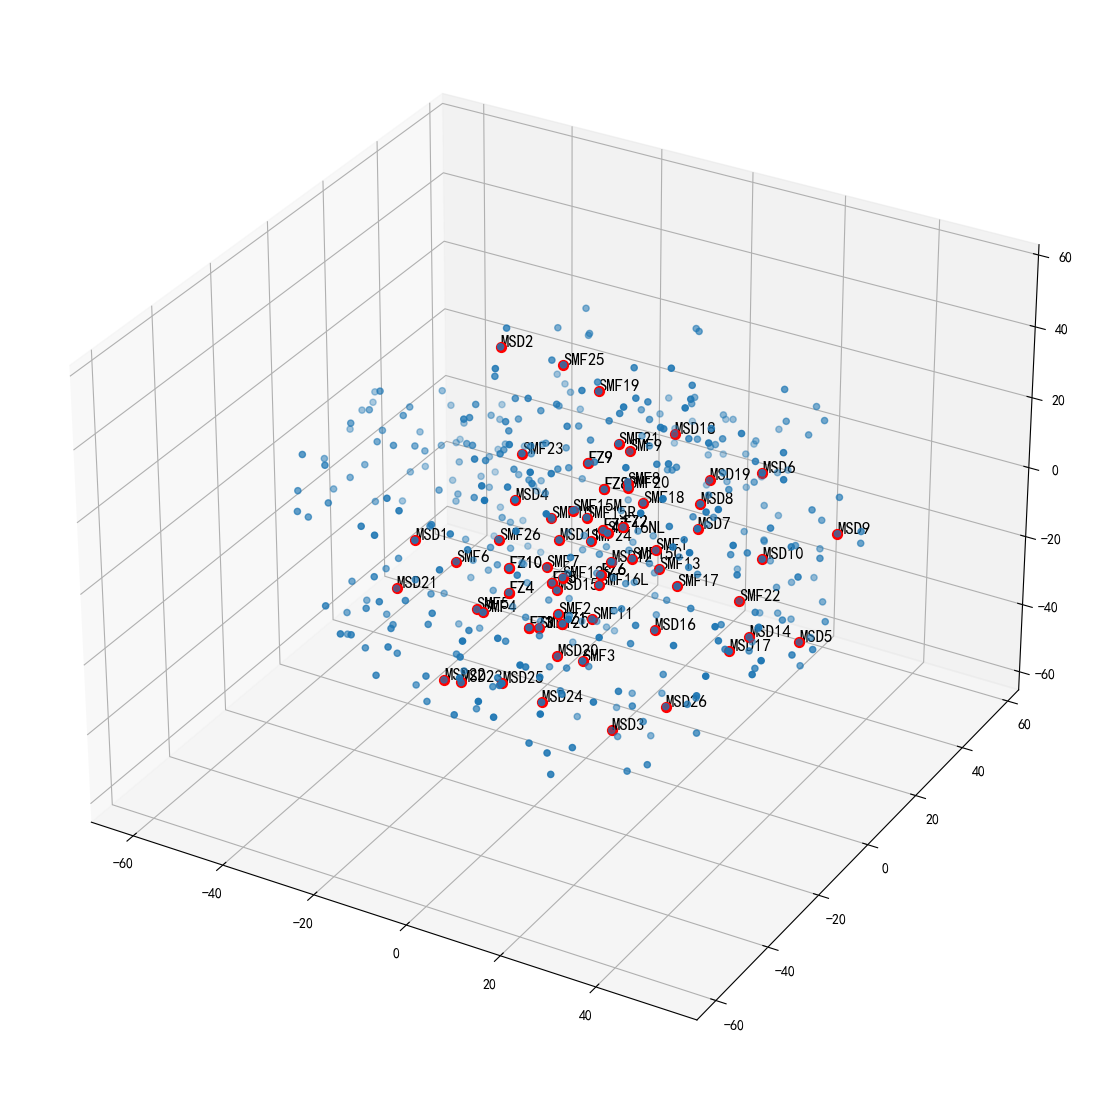

<Figure size 640x480 with 0 Axes>

In [34]:
from mpl_toolkits import mplot3d

df['X'] = tsne_embed_3d[:,0]
df['Y'] = tsne_embed_3d[:,1]
df['Z'] = tsne_embed_3d[:,2]

# 3DVisualization
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection='3d')
ax.scatter3D(df['X'], df['Y'], df['Z'])

for item in terms_chosen:
    idx = term2index[item]
    ax.scatter3D(tsne_embed_3d[idx,0], tsne_embed_3d[idx,1], tsne_embed_3d[idx,2] ,c='r',s=50)
    ax.text(tsne_embed_3d[idx,0], tsne_embed_3d[idx,1], tsne_embed_3d[idx,2],item, c='k',fontsize=12)
plt.show()
plt.savefig("3d_fig_tsne_1.svg")

In [35]:
# Search the vector of words
def w2v_search(word):
    
    v = df.loc[word, ['X','Y','Z']]
    
    return v

In [36]:
# Calculate the Euler distance of vectors
def distance_Euler(start, terminal):
    
    dis_x = (w2v_search(start)['X'] - w2v_search(terminal)['X'])**2
    dis_y = (w2v_search(start)['Y'] - w2v_search(terminal)['Y'])**2
    dis_z = (w2v_search(start)['Z'] - w2v_search(terminal)['Z'])**2
    distance = np.sqrt(dis_x + dis_y + dis_z)
    
    return distance

In [72]:
# Create softmax function and modify distance to probability

def softmax( f ):
    # instead: first shift the values of f so that the highest number is 0:
    f -= np.max(f) # f becomes [-666, -333, 0]
    return np.exp(f) / np.sum(np.exp(f))*20  # safe to do, gives the correct answer

In [38]:
def feature_confusion(sentence):
    start_matrix = np.identity(3)
    sentence_matrix = np.dot(np.array(w2v_search(sentence[0])).T,start_matrix.T)
    sentence_matrix = np.dot(np.array(w2v_search(sentence[1])).T,start_matrix)
    for i in range(2,len(sentence)):
        if np.mod(i, 3)==2:
            sentence_matrix = np.dot(np.array(w2v_search(sentence[i])).T,sentence_matrix.T)
        elif np.mod(i, 3)==0:
            sentence_matrix = np.dot(np.array(w2v_search(sentence[i])).T,sentence_matrix)
        elif np.mod(i, 3)==1:
            sentence_matrix = np.dot(np.array(w2v_search(sentence[i])).T,sentence_matrix)

    return sentence_matrix    

In [39]:
def smf_dis(conf):
    dis = [0]*28
    for i in range(28):
        dis[i] = np.sqrt(np.square(conf-w2v_search(smf.iloc[i])))
        dis.append(np.log(dis[i]))
        Dis = dis[0:28]
    
    return Dis

In [40]:
def horizon_normalization(matrix):
    h_norm = np.zeros(28)
    for i in range(28):
        h_norm[i] = np.linalg.norm(matrix[i])
    return h_norm

In [41]:
def vertical_norm(matrix):
    return softmax(matrix)

In [77]:
def pro_norm(data):
    norm_data = 1/data
    for i in range(len(norm_data)):
        if norm_data[i]<(np.min(norm_data)*1000):
            norm_data[i] = norm_data[i]
        else:
            continue
    return norm_data/np.sum(norm_data)

In [43]:
def fz_dis(conf):
    dis = [0]*10
    for i in range(10):
        dis[i] = np.sqrt(np.square(conf-w2v_search(fz.iloc[i])))
        dis.append(np.log(dis[i]))
        Dis = dis[0:10]
    
    return Dis

In [44]:
def horizon_normalization_fz(matrix):
    h_norm = np.zeros(10)
    for i in range(10):
        h_norm[i] = np.linalg.norm(matrix[i])
    return h_norm

In [45]:
# Distance test
dis1 = distance_Euler('Fossils_Tyes_mollusk','SMF8')
dis2 = distance_Euler('SMF7','SMF8')
dis3 = distance_Euler('FZ4','SMF8')

In [46]:
dis1

40.61878225741681

In [47]:
dis2

25.400119336480376

In [48]:
dis3

39.870779098358916

In [49]:
# Define a DataFrame, which the sequential int numbers (0，1，2，3......n) are index and standard microfacies (SMF1,SMF2,SMF3,......SMFn) 
# are objects, for searching
smf = ['SMF1','SMF2','SMF3','SMF4','SMF5','SMF6','SMF7','SMF8','SMF9','SMF10','SMF11','SMF12S','SMF12C','SMF13',
                   'SMF15C','SMF15R','SMF15M','SMF16L','SMF16NL','SMF17','SMF18','SMF19','SMF20','SMF21','SMF22','SMF23',
                   'SMF24','SMF25','SMF26']
smf = pd.DataFrame(smf)

In [50]:
id_73_s_conf = feature_confusion(['Grain_Tyes_bioclastic','Grain_content_common','Matrix_Tyes_micrite',
       'Matrix_content_common','Fossils_Tyes_crinoid',
       'Fossils_content_common',
       'Depositional_fabrics_strongly burrowed',
       'Texture_types_wackestone'])

In [51]:
id_73_s_conf

array([-11333588.14701854, -18084489.35985557, -28052778.80739747])

In [52]:
id_73_smf = smf_dis(id_73_s_conf)

In [53]:
id_73_smf

[                 X             Y             Z
 item                                          
 SMF1  1.133360e+07  1.808449e+07  2.805277e+07,
                  X             Y             Z
 item                                          
 SMF2  1.133360e+07  1.808445e+07  2.805278e+07,
                  X             Y             Z
 item                                          
 SMF3  1.133361e+07  1.808446e+07  2.805277e+07,
                  X             Y             Z
 item                                          
 SMF4  1.133359e+07  1.808445e+07  2.805278e+07,
                  X             Y             Z
 item                                          
 SMF5  1.133358e+07  1.808447e+07  2.805277e+07,
                  X             Y             Z
 item                                          
 SMF6  1.133357e+07  1.808447e+07  2.805278e+07,
                  X             Y             Z
 item                                          
 SMF7  1.133358e+07  1.808448e+07 

In [54]:
id_73_smf_hnorm = horizon_normalization(id_73_smf)

In [55]:
id_73_smf_hnorm

array([35248512.26910941, 35248499.89284011, 35248491.67269713,
       35248489.95510213, 35248485.34249944, 35248491.75750392,
       35248497.95319209, 35248520.24555889, 35248526.46226694,
       35248510.04108221, 35248496.9274409 , 35248504.28564043,
       35248489.993182  , 35248512.15304576, 35248513.34707601,
       35248518.9818879 , 35248516.49607757, 35248505.67949254,
       35248516.51343273, 35248514.62547654, 35248524.09599981,
       35248541.93844209, 35248529.29307275, 35248536.81008396,
       35248506.15129032, 35248524.6385266 , 35248517.17002351,
       35248543.81723623])

In [56]:
id_73_smf_vnorm = vertical_norm(id_73_smf_hnorm)

In [57]:
id_73_smf_vnorm

array([1.72479385e-14, 7.27430876e-20, 1.95807351e-23, 3.51468950e-24,
       3.48866340e-26, 2.13137622e-23, 1.04571490e-20, 5.02186679e-11,
       2.51621177e-08, 1.85830620e-15, 3.74917074e-21, 5.88248288e-18,
       3.65110937e-24, 1.53578843e-14, 5.06864812e-14, 1.41925310e-11,
       1.18164261e-12, 2.37084385e-17, 1.20232920e-12, 1.82009659e-13,
       2.36096982e-09, 1.32423377e-01, 4.26727402e-07, 7.84778362e-04,
       3.80016210e-17, 4.06169046e-09, 2.31834008e-12, 8.66791386e-01])

In [79]:
pro_norm(id_73_smf_vnorm)

array([1.97734898e-12, 4.68844460e-07, 1.74177289e-03, 9.70361495e-03,
       9.77600579e-01, 1.60014893e-03, 3.26142370e-06, 6.79133778e-16,
       1.35541825e-18, 1.83528385e-11, 9.09672990e-06, 5.79775485e-09,
       9.34104957e-03, 2.22069609e-12, 6.72865679e-13, 2.40303817e-15,
       2.88625285e-14, 1.43852551e-09, 2.83659365e-14, 1.87381229e-13,
       1.44454170e-17, 2.57546623e-25, 7.99226707e-20, 4.34583766e-23,
       8.97466810e-10, 8.39679782e-18, 1.47110400e-14, 3.93464842e-26])

In [59]:
fz = ['FZ1','FZ2','FZ3','FZ4','FZ5','FZ6','FZ7','FZ8','FZ9', 'FZ10']
fz = pd.DataFrame(fz)

In [60]:
sq_1 = ['SMF19','SMF18']

In [61]:
sq_1_conf = feature_confusion(sq_1)

In [62]:
sq_1_conf

array([13.69505978, -2.93251944, 15.54345131])

In [63]:
sq_1_fz = fz_dis(sq_1_conf)

In [64]:
sq_1_fz

[             X          Y          Z
 item                                
 FZ1   1.705944  27.260651  16.610381,
              X         Y          Z
 item                               
 FZ2   6.220798  3.622302  11.490561,
             X          Y          Z
 item                               
 FZ3   7.60695  29.312987  18.633316,
               X          Y          Z
 item                                 
 FZ4   16.868101  20.688282  18.117715,
               X         Y          Z
 item                                
 FZ5   12.790779  11.68254  19.780519,
              X         Y          Z
 item                               
 FZ6   4.438365  8.045002  16.703197,
              X         Y         Z
 item                              
 FZ7   6.029802  4.382417  7.144321,
              X         Y         Z
 item                              
 FZ8   3.885844  7.858056  7.350046,
              X        Y          Z
 item                              
 FZ9   7.360404  7.75835  

In [65]:
sq_1_fz_hnorm = horizon_normalization_fz(sq_1_fz)

In [66]:
sq_1_fz_hnorm

array([31.96807935, 13.55921725, 35.5572407 , 32.26126873, 26.29362451,
       19.06352377, 10.32499013, 11.43993014, 17.02304331, 31.62362796])

In [67]:
sq_1_fz_vnorm = vertical_norm(sq_1_fz_hnorm)

In [68]:
sq_1_fz_vnorm

array([2.54735261e-02, 2.57763748e-10, 9.22235922e-01, 3.41522717e-02,
       8.74388906e-05, 6.33449188e-08, 1.01534783e-11, 3.09618669e-11,
       8.23270171e-09, 1.80507698e-02])

In [78]:
pro_norm(sq_1_fz_vnorm)

array([2.91213422e-10, 2.87791933e-02, 8.04374732e-12, 2.17210521e-10,
       8.48390535e-08, 1.17108568e-04, 7.30609991e-01, 2.39592553e-01,
       9.01069052e-04, 4.10964895e-10])